In [14]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) +  + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

In [6]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
[0]


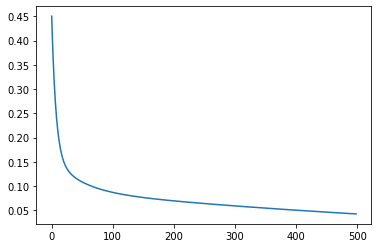

0.04273077845573425


In [68]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture




optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

# plt.ion()   # something about plotting

epoch=500
LossEpoch=np.array([0])
print(LossEpoch)

for t in range(epoch):
    
    
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    t1=loss.data.numpy()
#     print(t1)
    LossEpoch=np.append(LossEpoch,t1)
#     print(LossEpoch)
#     print(loss.data.numpy())
    
plt.ion()
plt.plot(LossEpoch[1:epoch])
plt.ioff()
plt.show()
print(LossEpoch[epoch-1])

# print(LossEpoch)
#     if t % 5 == 0:
#         # plot and show learning process
#         plt.cla()
#         plt.scatter(x.data.numpy(), y.data.numpy())
#         plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
#         plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
#         plt.pause(0.1)

# plt.ioff()
# plt.show()

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)
[0]


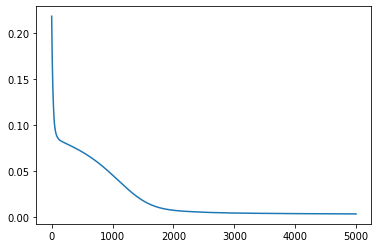

0.0031969035044312477


In [73]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
print(net2)


optimizer = torch.optim.SGD(net2.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


epoch=5000
LossEpoch=np.array([0])
print(LossEpoch)


for t in range(epoch):
    
    
    prediction = net2(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    t1=loss.data.numpy()


    LossEpoch=np.append(LossEpoch,t1)

    
plt.ion()
plt.plot(LossEpoch[1:epoch])
plt.ioff()
plt.show()
print(LossEpoch[epoch-1])